<a href="https://colab.research.google.com/github/yogeeshsm/Tensorflow_projects/blob/main/CNN_for_Handwritten_Digit_Recognition_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8960 - loss: 0.3425 - val_accuracy: 0.9813 - val_loss: 0.0625
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0514 - val_accuracy: 0.9850 - val_loss: 0.0487
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9897 - val_loss: 0.0357
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0219 - val_accuracy: 0.9862 - val_loss: 0.0534
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9888 - val_loss: 0.0397
Test Accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


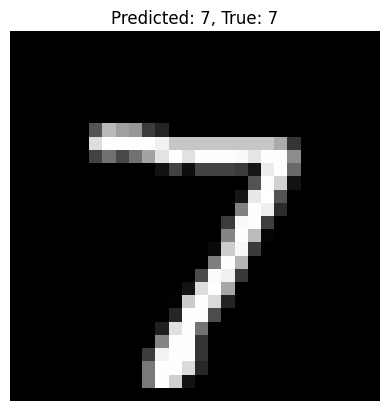

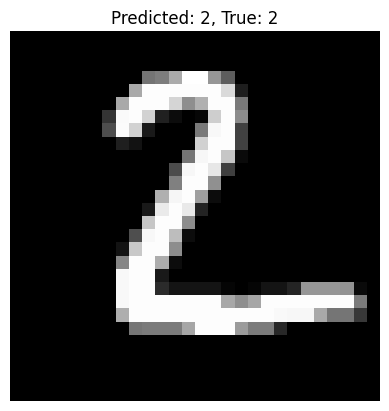

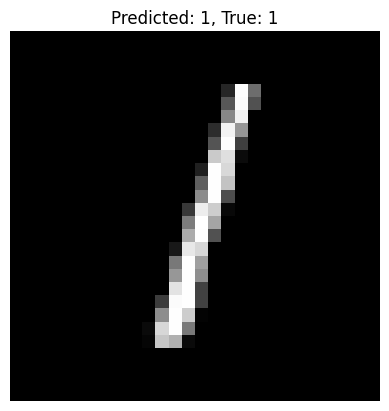

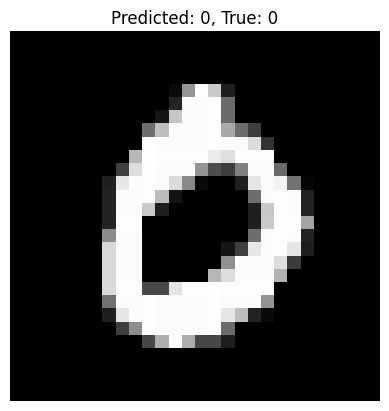

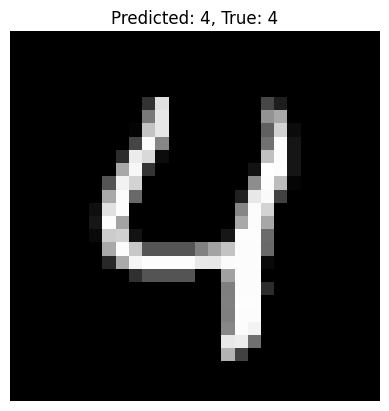

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape input images
X_train = X_train / 255.0                                # Normalize pixel values
X_test = X_test / 255.0
X_train = X_train[..., tf.newaxis]                       # Add channel dimension: (28, 28, 1)
X_test = X_test[..., tf.newaxis]

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    tf.keras.layers.MaxPooling2D(2, 2),                                             # Reduce spatial size
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                           # Deeper feature extraction
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),                                                     # Flatten before Dense layer
    tf.keras.layers.Dense(64, activation='relu'),                                  # Hidden dense layer
    tf.keras.layers.Dense(10, activation='softmax')                                # Output layer (10 classes)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN
model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Visualize predictions
preds = model.predict(X_test[:5])

# Convert X_test to a TensorFlow tensor before visualization
X_test_tensor = tf.convert_to_tensor(X_test)

for i, pred in enumerate(preds):
    plt.imshow(X_test_tensor[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(pred).numpy()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()